<a href="https://colab.research.google.com/github/ann04ka/CV_exercises/blob/main/Kalman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 19/05/24



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

fatal: destination path 'yolov7' already exists and is not an empty directory.
/content/yolov7


In [ ]:
img_zip_path = '/content/drive/MyDrive/images.zip'
annot_zip_path = '/content/drive/MyDrive/annotations-20240514T142305Z-001.zip'

In [ ]:
import zipfile

with zipfile.ZipFile(img_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
import zipfile

with zipfile.ZipFile(annot_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
python test.py --data data/coco.yaml --img 640 --batch 32 --conf 0.001 --iou 0.65 --device 0 --weights yolov7.pt --name yolov7_640_val

SyntaxError: invalid syntax (<ipython-input-6-6bc6e07cb95b>, line 1)

## 20/08/2024

# Old

In [ ]:
import tarfile
import zipfile

In [ ]:
name = 'bee-image-object-detection-DatasetNinja.tar'
path_to_drive = '/content/drive/MyDrive/'
# tar = tarfile.open(path_to_drive + name)
# tar.extractall(path='/home/' + 'tards')
# tar.close()

In [ ]:
name = 'pollen detection.v3-pollenbee1.yolov9.zip'
with zipfile.ZipFile(path_to_drive + name, 'r') as zip_ref:
    zip_ref.extractall('/home/' + 'zipds')

In [ ]:
name = 'weight.zip'
with zipfile.ZipFile(path_to_drive + name, 'r') as zip_ref:
    zip_ref.extractall('/home/' + 'weight')

In [ ]:
import os
import shutil
import pandas as pd
import numpy as np


def correct_l_to(path, new_class):

    list_project = []
    l_p = os.listdir(path)

    task_list = []

    for i in range(len(l_p)-1):
        print(l_p[i])

        try:
            data = pd.read_csv(path + l_p[i], sep=" ", header=None)
        except pd.errors.EmptyDataError:
            print(l_p[i], 'File is empty')
        else:
            p = a = [new_class for i in range(len(data))]
            data = data.drop(data.columns[0], axis=1)
            data.insert(loc=0, column='0', value=p)

            data.to_csv(path + l_p[i], header=None, index=None, sep=" ")

            print('len more then 0 Done!')

        print(l_p[i], 'len = 0 Done!')

In [ ]:
import os

train = 'zipds/train/labels/'
test = 'zipds/test/labels/'
val = 'zipds/valid/labels/'
HOME = '/home/'

correct_l_to(os.path.join(HOME, test), 0)

Beehive-3-15-2022-10_41_13am_mp4-22_jpg.rf.0a529a61a5c9e62a8bbbf2965f13d270.txt
len more then 0 Done!
Beehive-3-15-2022-10_41_13am_mp4-22_jpg.rf.0a529a61a5c9e62a8bbbf2965f13d270.txt len = 0 Done!
ezgif-frame-024-2-_png_jpg.rf.6a4cff3e0de96d1c163eae6c202f4213.txt
len more then 0 Done!
ezgif-frame-024-2-_png_jpg.rf.6a4cff3e0de96d1c163eae6c202f4213.txt len = 0 Done!
test_mp4-386_jpg.rf.dc15d3ba6b3741577fe406e432ebcf6a.txt
len more then 0 Done!
test_mp4-386_jpg.rf.dc15d3ba6b3741577fe406e432ebcf6a.txt len = 0 Done!
frame321_jpg.rf.47cf214e9fa7d1fe350929dfb5faf6e5.txt
len more then 0 Done!
frame321_jpg.rf.47cf214e9fa7d1fe350929dfb5faf6e5.txt len = 0 Done!
test_mp4-177_jpg.rf.5e50e1e30738c85bd7df1a80fe5b8b88.txt
len more then 0 Done!
test_mp4-177_jpg.rf.5e50e1e30738c85bd7df1a80fe5b8b88.txt len = 0 Done!
Beehive-3-17-2022-4_46_14pm_mp4-9_jpg.rf.2715c7467c70332005c7e00ff6d934cc.txt
len more then 0 Done!
Beehive-3-17-2022-4_46_14pm_mp4-9_jpg.rf.2715c7467c70332005c7e00ff6d934cc.txt len = 0 Done!


In [ ]:
correct_l_to(os.path.join(HOME, val), 0)

Выходные данные были обрезаны до нескольких последних строк (5000).
len more then 0 Done!
ezgif-frame-089-1-_png_jpg.rf.4e81985f24b3723db8042ab3632498eb.txt len = 0 Done!
ksnip_20220506-184508_png_jpg.rf.cb7f37ef8b298aa402507e9524ddcb3a.txt
len more then 0 Done!
ksnip_20220506-184508_png_jpg.rf.cb7f37ef8b298aa402507e9524ddcb3a.txt len = 0 Done!
Beehive-3-15-2022-3_15_37pm_mp4-13_jpg.rf.04e8d36cc6b1b34a527b672b1c49ac2f.txt
len more then 0 Done!
Beehive-3-15-2022-3_15_37pm_mp4-13_jpg.rf.04e8d36cc6b1b34a527b672b1c49ac2f.txt len = 0 Done!
img20180628081222_jpg.rf.67f8de5ff2e8b45dc1eac392ad626c05.txt
len more then 0 Done!
img20180628081222_jpg.rf.67f8de5ff2e8b45dc1eac392ad626c05.txt len = 0 Done!
ezgif-frame-149_png_jpg.rf.9decf79d79a01d7d867971464926913f.txt
len more then 0 Done!
ezgif-frame-149_png_jpg.rf.9decf79d79a01d7d867971464926913f.txt len = 0 Done!
test_mp4-124_jpg.rf.e23b3757c16530351d597d2ed7b300a7.txt
len more then 0 Done!
test_mp4-124_jpg.rf.e23b3757c16530351d597d2ed7b300a7.txt

In [ ]:
correct_l_to(os.path.join(HOME, train), 0)

Выходные данные были обрезаны до нескольких последних строк (5000).
len more then 0 Done!
test_mp4-145_jpg.rf.a979cbe0aba5b012315763a97ea530f8.txt len = 0 Done!
test_mp4-363_jpg.rf.d8261c6589061033d5741b0dc9b742dd.txt
len more then 0 Done!
test_mp4-363_jpg.rf.d8261c6589061033d5741b0dc9b742dd.txt len = 0 Done!
Beehive-3-14-2022-2_47_11pm_mp4-270_jpg.rf.66fdd4a6983e3ed3217532074410f303.txt
len more then 0 Done!
Beehive-3-14-2022-2_47_11pm_mp4-270_jpg.rf.66fdd4a6983e3ed3217532074410f303.txt len = 0 Done!
Beehive-3-17-2022-4_46_14pm_mp4-9_jpg.rf.dd00318f325920020bfa0bccfbdac29a.txt
len more then 0 Done!
Beehive-3-17-2022-4_46_14pm_mp4-9_jpg.rf.dd00318f325920020bfa0bccfbdac29a.txt len = 0 Done!
img_49_jpg.rf.0c8e056040df478c214f5b3fc0ee695a.txt
len more then 0 Done!
img_49_jpg.rf.0c8e056040df478c214f5b3fc0ee695a.txt len = 0 Done!
img_52_jpg.rf.bc316d7ec8527711965acd7b6426d1b9.txt
len more then 0 Done!
img_52_jpg.rf.bc316d7ec8527711965acd7b6426d1b9.txt len = 0 Done!
img_63_jpg.rf.cd00e128a62

In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install -q supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
# !mkdir -p {HOME}/weights
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt

In [ ]:
from ultralytics import YOLOv10

model = YOLOv10('/home/weight/detect/train2/weights/best.pt')
results = model(source='/home/zipds/train/images/063_jpg.rf.1be9486ec09ed79713bcb945e21feaed.jpg', conf=0.25)


image 1/1 /home/zipds/train/images/063_jpg.rf.1be9486ec09ed79713bcb945e21feaed.jpg: 640x640 100 bees, 1 pollenbee, 1612.3ms
Speed: 20.5ms preprocess, 1612.3ms inference, 25.2ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results[0].boxes.xyxy

tensor([[6.7828e+01, 3.3047e+02, 1.5344e+02, 5.1566e+02],
        [7.3730e+01, 1.3416e+02, 9.0611e+01, 1.5800e+02],
        [4.7193e+02, 1.0312e+02, 4.8075e+02, 1.3879e+02],
        [3.6226e+02, 1.4464e+02, 3.7130e+02, 1.7471e+02],
        [3.2462e+02, 1.5631e+02, 3.4056e+02, 1.8870e+02],
        [9.7528e+01, 2.1294e+02, 1.1212e+02, 2.3517e+02],
        [5.8553e+01, 2.1330e+02, 7.4116e+01, 2.3144e+02],
        [8.2392e+01, 2.1284e+01, 1.0004e+02, 3.6950e+01],
        [3.0545e+02, 1.7067e+02, 3.2486e+02, 1.8714e+02],
        [1.6106e+02, 9.0438e+01, 1.7974e+02, 1.0513e+02],
        [1.1737e+02, 1.8231e+02, 1.2798e+02, 2.0937e+02],
        [1.9126e+02, 1.1039e+02, 2.0976e+02, 1.2926e+02],
        [1.5441e+02, 1.8683e+02, 1.6733e+02, 2.1019e+02],
        [1.1617e+02, 1.6521e+02, 1.3094e+02, 1.7994e+02],
        [8.6252e+01, 1.1301e+02, 9.6327e+01, 1.3688e+02],
        [1.3351e+02, 1.3362e+02, 1.5134e+02, 1.5320e+02],
        [9.0227e+01, 4.0152e+01, 1.0465e+02, 6.1454e+01],
        [1.099


0: 640x640 100 bees, 1 pollenbee, 682.5ms
Speed: 3.2ms preprocess, 682.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


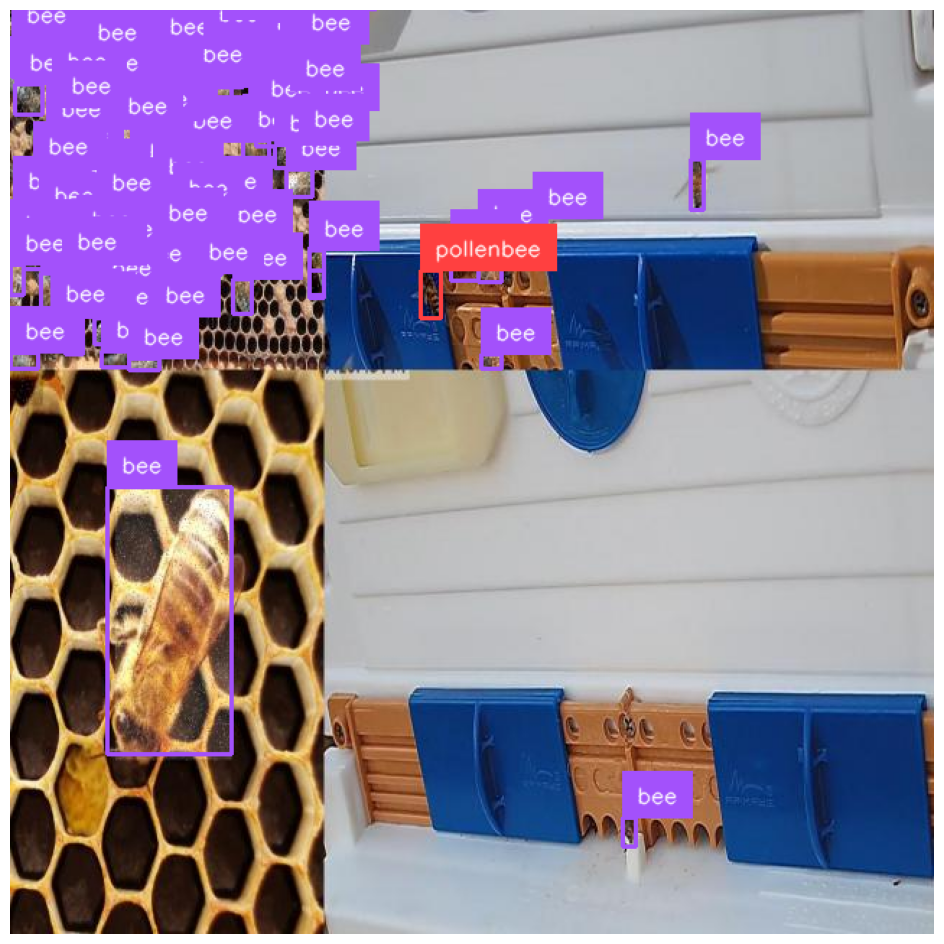

In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10('/home/weight/detect/train2/weights/best.pt')
image = cv2.imread('/home/zipds/train/images/063_jpg.rf.1be9486ec09ed79713bcb945e21feaed.jpg')
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
HOME = '/home'
print(HOME)

/home


In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=1 batch=16 plots=True \
model= /home/weight/detect/train2/weights/best.pt \
data= /home/zipds/data.yaml

/home
New https://pypi.org/project/ultralytics/8.2.79 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/home/weight/detect/train2/weights/best.pt, data=/home/zipds/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=10 batch=32 plots=True \
model= /home/runs/detect/train/weights/last.pt \
data= /home/lollenbeedetection/data.yaml

/home
Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.10/dist-packages/torch/_dynamo/convert_frame.py", line 31, in <module>
    from torch.fx.experimental.symbolic_shapes import (
  File "/usr/local/lib/python3.10/dist-packages/torch/fx/experimental/symbolic_shapes.py", line 63, in <module>
    from torch.utils._sympy.functions import FloorDiv, Mod, IsNonOverlappingAndDenseIndicator
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_sympy/functions.py", line 1, in <module>
    import sympy
  File "/usr/local/lib/python3.10/dist-packages/sympy/__init__.py", line 22, in <module>
    import mpmath
  File "/usr/local/lib/python3.10/dist-packages/mpmath/__init__.py", line 5, in <module>
    from .ctx_fp import FPContext
  File "/usr/local/lib/py

In [ ]:
import shutil
shutil.make_archive('/home/weight', 'zip', '/home/runs/')

'/home/weight.zip'

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=1 batch=1 plots=True \
model= /home/weight/detect/train2/weights/best.pt \
data= /home/zipds/data.yaml

/home
New https://pypi.org/project/ultralytics/8.2.79 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/home/weight/detect/train2/weights/best.pt, data=/home/zipds/data.yaml, epochs=1, time=None, patience=100, batch=1, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

In [ ]:
!nvidia-smi

Tue Aug 20 21:25:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0              32W /  70W |    583MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 10/10/2024

In [30]:
!pip install ultralytics

In [31]:
from ultralytics import YOLO

model = YOLO("/content/yolo11s-pose.pt")

In [32]:
# import time
# import numpy as np

# t = []
# for i in range(21):
#   current_time = time.time()
#   results = model("/content/WIN_20241010_18_01_01_Pro.mp4", save=True, show_boxes=False)
#   t.append(time.time() - current_time)
# print(np.mean(t))

In [123]:
results = model("/content/drive/MyDrive/KF/WIN_20241010_18_01_01_Pro.mp4", save=True, show_boxes=False, save_txt=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/149) /content/drive/MyDrive/KF/WIN_20241010_18_01_01_Pro.mp4: 480x640 1 person, 14.8ms
video 1/1 (frame 2/149) /content/drive/MyDrive/KF/WIN_20241010_18_01_01_Pro.mp4: 480x640 1 person, 13.6ms
video 1/1 (frame 3/149) /content/drive/MyDrive/KF/WIN_20241010_18_01_01_Pro.mp4: 480x640 1 person, 13.6ms
video 1/1 (frame 4/149) /content/drive/MyDrive/KF/WIN_20241010_18_01_01_Pro.mp4: 480x640 1 person, 14.3ms
video 1/1 (frame 5/149) /content

In [124]:
!pip install protobuf 4.21

ERROR: Could not find a version that satisfies the requirement 4.21 (from versions: none)
ERROR: No matching distribution found for 4.21


In [125]:
!pip install -q mediapipe

In [126]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [127]:
# t = []
# for i in range(21):
#   current_time = time.time()
#   !python3 /content/annotateVideos.py /content/WIN_20241010_18_01_01_Pro.mp4
#   t.append(time.time() - current_time)
# print(np.mean(t))

In [128]:
import time

current_time = time.time()
!python3 /content/drive/MyDrive/KF/annotateVideos.py /content/drive/MyDrive/KF/WIN_20241010_18_01_01_Pro.mp4
print(time.time() - current_time)

# current_time = time.time()
# results = model("/content/WIN_20241010_18_01_01_Pro.mp4", save=True, show_boxes=False, save_txt=True)
# print(time.time() - current_time)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
W0000 00:00:1737375115.535709   19225 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737375115.592947   19225 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737375115.615043   19226 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
13.464444637298584


In [129]:
import os
import glob

def extract_yolo_predictions_from_labels(directory):
    # Список для хранения всех списков точек
    all_predictions = []

    # Путь к текстовым файлам
    path = os.path.join(directory, '*.txt')

    # Получение списка всех текстовых файлов в указанной директории
    label_files = glob.glob(path)
    print(len(label_files))

    # Обработка каждого файла
    for n in range(1, len(label_files) + 1):
        file = f'/content/runs/pose/predict/labels/WIN_20241010_18_01_01_Pro_{n}.txt'
        # print(file)
        with open(file, 'r') as f:
            predictions = []
            # Чтение строк из файла
            for line in f:
                # Разделяем строку по пробелам и преобразуем в числа
                points = list(map(float, line.strip().split()))
                # Добавляем точки в список предсказаний
                predictions.append(points)
        # Добавляем список предсказаний для текущего файла в общий список
        all_predictions.append(predictions)

    return all_predictions

# Пример использования функции:
directory = '/content/runs/pose/predict/labels'
predictions_list = extract_yolo_predictions_from_labels(directory)

# Если нужно вывести результат:
# for idx, preds in enumerate(predictions_list):
#     print(f"Predictions from file {idx + 1}: {preds[:]}")

149


In [130]:
import cv2 as cv
from google.colab.patches import cv2_imshow

cap = cv.VideoCapture('/content/drive/MyDrive/KF/WIN_20241010_18_01_01_Pro.mp4')
count = 0
success = True

while success:
  success,image = cap.read()
  cv.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file
  if count == 148:                     # exit if Escape is hit
      break
  shape = image.shape
  count += 1

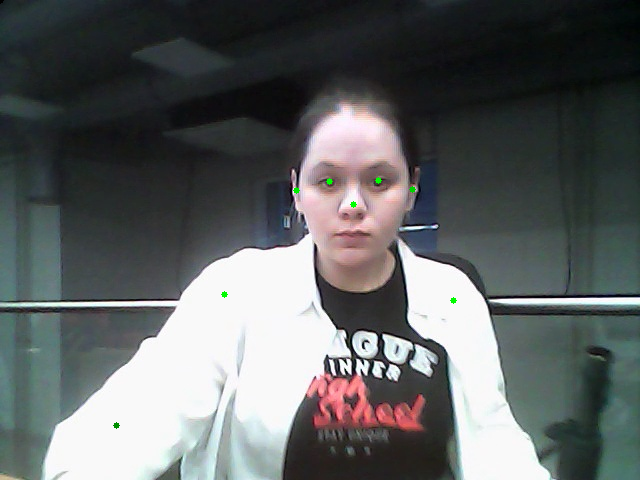

In [131]:
import os
import ultralytics

# 0: Nose 1: Left Eye 2: Right Eye 3: Left Ear 4: Right Ear 5: Left Shoulder
# 6: Right Shoulder 7: Left Elbow 8: Right Elbow 9: Left Wrist 10: Right Wrist
# 11: Left Hip 12: Right Hip 13: Left Knee
# 14: Right Knee 15: Left Ankle 16: Right Ankle

n = 2
image = cv.imread(f'/content/frame{n}.jpg')

x = [int(x * shape[1]) for x in predictions_list[n][0][5:len(predictions_list[n][0][:]):3]]
y = [int(y * shape[0]) for y in predictions_list[n][0][6:len(predictions_list[n][0][:]):3]]
visibility = [v for v in predictions_list[n][0][7:len(predictions_list[n][0][:]):3]]
# print(len(predictions_list[:]), len(x), len(y), len(visibility))
# print(x)
# print(y)
# print(visibility)

for x, y, visibility in zip(x, y, visibility):
  cv.circle(image, (x, y), radius=3, color=(0, int(255 * visibility), 0), thickness=-1)

cv2_imshow(image)



In [132]:
import numpy as np
import torch
from typing import Tuple


def constantVelocityModel(n_kpts: int, dt: float, measurement_type='xy') -> Tuple[torch.Tensor]:
    A = np.concatenate((np.concatenate((np.eye(n_kpts * 2), np.eye(n_kpts * 2) * dt), axis=1),
    np.concatenate((np.zeros((n_kpts * 2, n_kpts * 2)), np.eye(n_kpts * 2)), axis=1)), axis=0)
    A = torch.from_numpy(A)
    # init process noise covariance matrix based on acceleration
    Q = np.concatenate((np.concatenate((np.eye(n_kpts * 2) * 0.25 * dt ** 4, np.eye(n_kpts * 2) * 0.5 * dt ** 3), axis=1),
    np.concatenate((np.eye(n_kpts * 2) * 0.5 * dt ** 3, np.eye(n_kpts * 2) * dt ** 2), axis=1)), axis=0)
    Q = torch.from_numpy(Q)
    if measurement_type == 'xy':
        # init measurement error covariance matrix
        R = np.eye(n_kpts * 2)
        # init observation transition matrix
        H = np.concatenate((np.eye(n_kpts * 2), np.zeros((n_kpts * 2, n_kpts * 2))), axis=1)
    else:
        # init measurement error covariance matrix (random for now)
        R = np.eye(n_kpts * 4)
        # init observation transition matrix
        H = np.eye(n_kpts * 4)
    R = torch.from_numpy(R)
    H = torch.from_numpy(H)
    return A, H, Q, R


def constantAccelerationModel(n_kpts: int, dt: float, measurement_type='xy') -> Tuple[torch.Tensor]:
    A = np.eye(n_kpts * 6)
    A[: 2*n_kpts, 2*n_kpts : 4*n_kpts] = np.eye(2*n_kpts) * dt
    A[2*n_kpts : 4*n_kpts, 4*n_kpts :] = np.eye(2*n_kpts) * dt
    A[: 2*n_kpts, 4*n_kpts :] = np.eye(2*n_kpts) * 0.5 * dt ** 2
    A = torch.from_numpy(A)
    # init process noise covariance matrix based on acceleration
    Q11 = np.eye(n_kpts * 2) * 0.25 * dt ** 4
    Q12_21 = np.eye(n_kpts * 2) * 0.5 * dt ** 3
    Q13_31 = np.eye(n_kpts * 2) * 0.5 * dt ** 2
    Q22 = Q13_31 * 2
    Q33 = np.eye(n_kpts * 2)
    Q23_32 = np.eye(n_kpts * 2) * dt
    Q = np.concatenate((np.concatenate((Q11, Q12_21, Q13_31), axis=1),
    np.concatenate((Q12_21, Q22, Q23_32), axis=1),
    np.concatenate((Q13_31, Q23_32, Q33), axis=1)), axis=0)
    Q = torch.from_numpy(Q)
    if measurement_type == 'xy':
        # init measurement error covariance matrix
        R = np.eye(n_kpts * 2)
        # init observation transition matrix
        H = np.concatenate((np.eye(n_kpts * 2), np.zeros((n_kpts * 2, n_kpts * 4))), axis=1)
    else:
        # init measurement error covariance matrix (random for now)
        R = np.eye(n_kpts * 4)
        # init observation transition matrix
        H = H = np.concatenate((np.eye(n_kpts * 4), np.zeros((n_kpts * 4, n_kpts * 2))), axis=1)
    R = torch.from_numpy(R)
    H = torch.from_numpy(H)
    return A, H, Q, R

In [133]:
import torch


class LinearKalmanFilter:
    def __init__(self, A: torch.Tensor, H: torch.Tensor, Q: torch.Tensor,
                 R: torch.Tensor, x: torch.Tensor):
        self.A = A.float()
        self.H = H.float()
        self.Q = Q.float()
        self.R = R.float()
        self.P = torch.eye(A.size()[0]) * 100
        self.x = x[:, None].float()
        self.A_t = A.T.float()
        self.H_t = H.T.float()
        self.I = torch.eye(A.size()[0])
        self.device = 'cpu'

    def to(self, device='cuda'):
        self.A = self.A.to(device)
        self.H = self.H.to(device)
        self.Q = self.Q.to(device)
        self.R = self.R.to(device)
        self.P = self.P.to(device)
        self.x = self.x.to(device)
        self.A_t = self.A_t.to(device)
        self.H_t = self.H_t.to(device)
        self.I = self.I.to(device)
        self.device = device

    def predict(self):
        self.x = torch.mm(self.A, self.x)
        self.P = torch.mm(torch.mm(self.A, self.P), self.A_t) + self.Q

    def update(self, z: torch.Tensor) -> torch.Tensor:
        z = z.to(self.device).float()
        P_inv = torch.inverse(self.P)
        S = torch.mm(torch.mm(self.H, P_inv), self.H_t) + self.R
        S_inv = torch.inverse(S)
        K = torch.mm(torch.mm(P_inv, self.H_t), S_inv)
        self.x += torch.mm(K, z[:, None] - torch.mm(self.H, self.x))
        self.P = torch.mm(self.I - torch.mm(K, self.H), P_inv)
        return self.x.cpu().flatten()

In [134]:
# pr = torch.from_numpy(np.load('/content/predictions.npy'))
# print(pr[0].flatten())

In [135]:
predict = []
for n in range(len(predictions_list)):
  pr = []
  x = [int(x * shape[1]) for x in predictions_list[n][0][5:42:3]]
  y = [int(y * shape[0]) for y in predictions_list[n][0][6:43:3]]
  # print(len(x))
  # print(len(y))

  for i in range(len(x)):
    pr.append([x[i], y[i]])
  predict.append(pr)

predict

[[[354, 204],
  [382, 179],
  [330, 179],
  [417, 190],
  [295, 188],
  [458, 306],
  [214, 306],
  [493, 441],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[353, 205],
  [380, 179],
  [329, 180],
  [416, 188],
  [295, 188],
  [457, 299],
  [221, 293],
  [0, 0],
  [114, 427],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[353, 204],
  [378, 180],
  [329, 181],
  [412, 189],
  [296, 190],
  [453, 300],
  [224, 294],
  [0, 0],
  [116, 425],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[352, 205],
  [376, 182],
  [329, 183],
  [409, 190],
  [297, 191],
  [451, 298],
  [226, 295],
  [0, 0],
  [122, 426],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[350, 206],
  [373, 186],
  [328, 187],
  [405, 198],
  [298, 198],
  [448, 303],
  [230, 294],
  [0, 0],
  [126, 420],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[350, 209],
  [372, 187],
  [328, 189],
  [404, 195],
  [300, 198],
  [452, 303],
  [237, 296],
  [0, 0],
  [129, 430],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[348, 213],
  [370, 

In [137]:
predict = torch.Tensor(predict)
predict[0].flatten()

tensor([354., 204., 382., 179., 330., 179., 417., 190., 295., 188., 458., 306., 214., 306., 493., 441.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [138]:
predictions = torch.Tensor(predict)

 99%|█████████▉| 148/149 [00:00<00:00, 1601.39it/s]


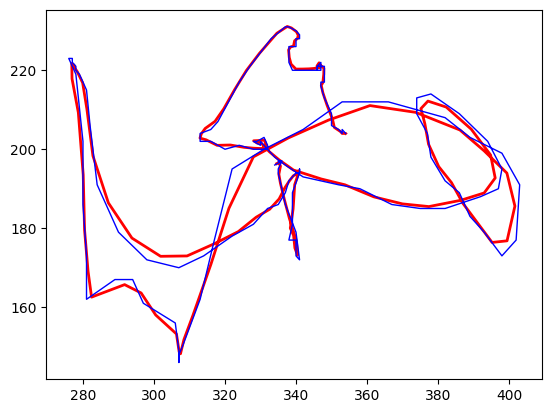

In [166]:
import torch
import numpy as np
# from dynamic_models import constantAccelerationModel
# from kalmantorch import LinearKalmanFilter
from tqdm import tqdm
import matplotlib.pyplot as plt


# predictions = np.load('predictions.npy')[:900]
# R = torch.from_numpy(np.load('/content/drive/MyDrive/KF/R.npy'))

dt = 1 / 25
n_kpts = 13

A, H, Q, R = constantAccelerationModel(n_kpts, dt, 'xy')

x0 = predictions[0].flatten()
kalman = LinearKalmanFilter(A, H, Q , R, torch.from_numpy(np.concatenate((x0, np.zeros_like(x0), np.zeros_like(x0)))))

filtered = [x0, ]
for z in tqdm(predictions[1:], total=predictions.shape[0]):
    z = z.flatten().numpy()
    kalman.predict()
    x = kalman.update(torch.from_numpy(z)).numpy()[:n_kpts * 2]
    filtered.append(x)

filtered = np.array(filtered)
predictions = predictions.reshape(filtered.shape)
# print(filtered.shape)

x_nose_f = filtered[:, 0]
x_nose_d = predictions[:, 0]



plt.plot(filtered[:, 0], filtered[:, 1], 'r-', linewidth=2)
plt.plot(predictions[:, 0], predictions[:, 1], 'b-', linewidth=1)
plt.show()

In [142]:
filtered_new = filtered.reshape(149, 13, 2).tolist()

In [143]:
filtered_new

[[[354.0, 204.0],
  [382.0, 179.0],
  [330.0, 179.0],
  [417.0, 190.0],
  [295.0, 188.0],
  [458.0, 306.0],
  [214.0, 306.0],
  [493.0, 441.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0]],
 [[353.9901123046875, 204.00990295410156],
  [381.9801940917969, 179.0],
  [329.9901123046875, 179.00990295410156],
  [416.9901123046875, 189.98019409179688],
  [295.0, 188.0],
  [457.9901123046875, 305.9306945800781],
  [214.06930541992188, 305.87127685546875],
  [488.1188049316406, 436.6336669921875],
  [1.1287128925323486, 4.227722644805908],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0]],
 [[353.00970458984375, 204.00009155273438],
  [378.0389709472656, 179.99020385742188],
  [329.00970458984375, 180.9805145263672],
  [412.0488586425781, 189.0095977783203],
  [295.9902038574219, 189.9804229736328],
  [453.0488586425781, 300.05804443359375],
  [223.9027862548828, 294.1162109375],
  [4.778076171875, 4.274078369140625],
  [114.87555694580078, 420.88116455078125],
 

In [51]:
filtered[0][::2]

array([        354,         382,         330,         417,         295,         458,         214,         493,           0,           0,           0,           0,           0], dtype=float32)

In [52]:
filtered[0][1::2]

array([        204,         179,         179,         190,         188,         306,         306,         441,           0,           0,           0,           0,           0], dtype=float32)

In [53]:
for n in range(149):
  image = cv.imread(f'/content/frame{n}.jpg')

  x = [int(x * shape[1]) for x in predictions_list[n][0][5:len(predictions_list[n][0][:]):3]]
  y = [int(y * shape[0]) for y in predictions_list[n][0][6:len(predictions_list[n][0][:]):3]]
  visibility = [v for v in predictions_list[n][0][7:len(predictions_list[n][0][:]):3]]
  # print(len(predictions_list[:]), len(x), len(y), len(visibility))
  # print(x)
  # print(y)
  # print(visibility)

  for x, y, visibility in zip(x, y, visibility):
    cv.circle(image, (x, y), radius=3, color=(0, int(255 * visibility), 0), thickness=-1)

  cv.imwrite(f'/content/frame{n}.jpg', image)


In [54]:
for n in range(149):
  image = cv.imread(f'/content/frame{n}.jpg')

  x = filtered[n][::2].tolist()
  y = filtered[n][1::2].tolist()

  x = [int(i) for i in x]
  y = [int(i) for i in y]

  # print(len(x))
  # print(len(x))

  for x, y in zip(x, y):
    cv.circle(image, (x, y), radius=3, color=(int(255 * 1), 0, 0), thickness=-1)

  cv.imwrite('/content/new1/frame_0%04d.jpg' %n, image)

In [55]:
import os
import cv2
from PIL import Image

# Checking the current directory path
print(os.getcwd())

# Folder which contains all the images
# from which video is to be generated

path = "/content/new1"

mean_height = 0
mean_width = 0

num_of_images = len(os.listdir('/content/new1'))
# print(num_of_images)

for file in os.listdir('/content/new1'):
    im = Image.open(os.path.join(path, file))
    width, height = im.size
    mean_width += width
    mean_height += height
    # im.show()   # uncomment this for displaying the image

# Finding the mean height and width of all images.
# This is required because the video frame needs
# to be set with same width and height. Otherwise
# images not equal to that width height will not get
# embedded into the video
mean_width = int(mean_width / num_of_images)
mean_height = int(mean_height / num_of_images)

# print(mean_height)
# print(mean_width)

# Resizing of the images to give
# them same width and height
for file in os.listdir('/content/new1'):
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        # opening image using PIL Image
        im = Image.open(os.path.join(path, file))

        # im.size includes the height and width of image
        width, height = im.size
        print(width, height)

        # resizing
        imResize = im.resize((mean_width, mean_height), Image.Resampling.LANCZOS)
        # imResize.save( file, 'JPEG', quality = 95) # setting quality
        # printing each resized image name
        print(im.filename.split('\\')[-1], " is resized")


# Video Generating function
def generate_video():
    image_folder = '/content/new1/' # make sure to use your folder
    video_name = 'efk_mygeneratedvideo.avi'

    images = [img for img in os.listdir(image_folder)]
    images.sort()

    # Array images should only consider
    # the image files ignoring others if any
    print(images)

    frame = cv2.imread(os.path.join(image_folder, images[0]))

    # setting the frame width, height width
    # the width, height of first image
    height, width, layers = frame.shape

    video = cv2.VideoWriter(filename=video_name,
                            fourcc=cv2.VideoWriter_fourcc(*'MJPG'), fps=10,
                            frameSize=(width, height))

    # Appending the images to the video one by one
    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    # Deallocating memories taken for window creation
    cv2.destroyAllWindows()
    video.release()  # releasing the video generated


# Calling the generate_video function
generate_video()

/content
640 480
/content/new1/frame_00091.jpg  is resized
640 480
/content/new1/frame_00133.jpg  is resized
640 480
/content/new1/frame_00113.jpg  is resized
640 480
/content/new1/frame_00146.jpg  is resized
640 480
/content/new1/frame_00083.jpg  is resized
640 480
/content/new1/frame_00112.jpg  is resized
640 480
/content/new1/frame_00107.jpg  is resized
640 480
/content/new1/frame_00086.jpg  is resized
640 480
/content/new1/frame_00128.jpg  is resized
640 480
/content/new1/frame_00064.jpg  is resized
640 480
/content/new1/frame_00024.jpg  is resized
640 480
/content/new1/frame_00079.jpg  is resized
640 480
/content/new1/frame_00023.jpg  is resized
640 480
/content/new1/frame_00127.jpg  is resized
640 480
/content/new1/frame_00088.jpg  is resized
640 480
/content/new1/frame_00069.jpg  is resized
640 480
/content/new1/frame_00103.jpg  is resized
640 480
/content/new1/frame_00005.jpg  is resized
640 480
/content/new1/frame_00129.jpg  is resized
640 480
/content/new1/frame_00114.jpg  is

## 20/01/2024

In [107]:
import torch

class UnscentedKalmanFilter:
    def __init__(self, n: int, alpha: float, beta: float, kappa: float, Q: torch.Tensor, R: torch.Tensor, x: torch.Tensor):
        self.n = n
        self.alpha = alpha
        self.beta = beta
        self.kappa = kappa
        self.Q = Q.float()
        self.R = R.float()
        self.x = x[:, None].float()
        self.P = torch.eye(n) * 100
        self.device = 'cpu'

        self.lambda_ = alpha**2 * (n + kappa) - n
        self.weights_m = torch.cat((torch.tensor([self.lambda_ / (n + self.lambda_)]),
                                    torch.tensor([1 / (2 * (n + self.lambda_))] * (2 * n))))
        self.weights_c = torch.cat((torch.tensor([self.lambda_ / (n + self.lambda_) + (1 - alpha**2 + beta)]),
                                    torch.tensor([1 / (2 * (n + self.lambda_))] * (2 * n))))

    def to(self, device='cuda'):
        self.Q = self.Q.to(device)
        self.R = self.R.to(device)
        self.P = self.P.to(device)
        self.x = self.x.to(device)
        self.weights_m = self.weights_m.to(device)
        self.weights_c = self.weights_c.to(device)
        self.device = device

    def sigma_points(self):
        sqrt_P = torch.cholesky(self.P * (self.n + self.lambda_))
        X = torch.cat((self.x, self.x + sqrt_P, self.x - sqrt_P), dim=1)
        return X

    def predict(self, f):
        X = self.sigma_points()
        X_pred = f(X)
        self.x = torch.mm(X_pred, self.weights_m[:, None])
        X_diff = X_pred - self.x
        self.P = torch.mm(X_diff, torch.mm(torch.diag(self.weights_c), X_diff.T)) + self.Q

    def update(self, z: torch.Tensor, h) -> torch.Tensor:
        z = z.to(self.device).float()
        X = self.sigma_points()
        Z = h(X)
        z_pred = torch.mm(Z, self.weights_m[:, None])
        Z_diff = Z - z_pred
        P_zz = torch.mm(Z_diff, torch.mm(torch.diag(self.weights_c), Z_diff.T)) + self.R
        P_xz = torch.mm(X - self.x, torch.mm(torch.diag(self.weights_c), Z_diff.T))
        K = torch.mm(P_xz, torch.inverse(P_zz))
        self.x += torch.mm(K, z[:, None] - z_pred)
        self.P -= torch.mm(K, torch.mm(P_zz, K.T))
        return self.x.cpu().flatten()

In [179]:
# Пример функций перехода состояния и измерения
def f(X):
    # Пример функции перехода состояния (идентичность для простоты)
    return X

def h(X):
    # Пример функции измерения (идентичность для простоты)
    return X

# Инициализация UKF
n = 26  # Размерность состояния (13 пар x, y)
alpha = 0.1
beta = 2.0
kappa = 0.0
Q = torch.eye(n) * 0.1  # Ковариация шума процесса
R = torch.eye(n) * 1.0  # Ковариация шума измерения
x = x0  # Начальная оценка состояния

ukf = UnscentedKalmanFilter(n, alpha, beta, kappa, Q, R, x)

# Цикл для фильтрации предсказаний
filtered_predictions = []
for prediction in predictions:
    ukf.predict(f)
    filtered_prediction = ukf.update(prediction, h)
    filtered_predictions.append(filtered_prediction)

# filtered_predictions теперь содержит отфильтрованные предсказания

 99%|█████████▉| 148/149 [00:00<00:00, 1913.29it/s]


[[     354.01         204      381.99 ...   5.199e-15  5.2007e-15   5.199e-15]
 [     353.44      204.52      380.94 ... -2.1153e-07 -2.1158e-07 -2.1155e-07]
 [     353.27      204.32      379.83 ... -4.8634e-08  -2.244e-07 -1.8448e-07]
 ...
 [      336.1      192.43      366.48 ... -6.4294e-08  2.0794e-08  1.6839e-07]
 [     336.07      193.66      366.36 ... -3.4237e-09  4.5088e-08  1.5628e-07]
 [     335.51      194.29      365.99 ...  3.6161e-08  7.7774e-08  4.0573e-08]]


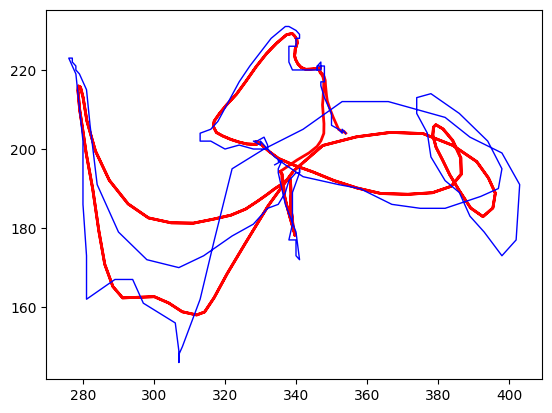

In [180]:
x0 = predictions[0].flatten()
kalman = UnscentedKalmanFilter(n, alpha, beta, kappa, Q, R, x0)

filtered = [x0, ]
for z in tqdm(predictions[1:], total=predictions.shape[0]):

    ukf.predict(f)
    filtered_prediction = ukf.update(z, h)
    filtered_predictions.append(filtered_prediction)

# filtered = filtered_predictions.numpy()
filtered = np.array([f_pred.numpy() for f_pred in filtered_predictions])
print(filtered)
predictions = predictions.reshape((149, 26))

x_nose_f = filtered[:, 0]
x_nose_d = predictions[:, 0]



plt.plot(filtered[:, 0], filtered[:, 1], 'r-', linewidth=2)
plt.plot(predictions[:, 0], predictions[:, 1], 'b-', linewidth=1)
plt.show()

tensor([354., 204., 382., 179., 330., 179., 417., 190., 295., 188., 458., 306., 214., 306., 493., 441.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])